In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [41]:
dataset=pd.read_csv('car performance.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [42]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [43]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [44]:
dataset['horsepower'].isnull().sum()

6

In [45]:
dataset['horsepower']=dataset['horsepower'].astype('float64')
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [46]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [47]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [48]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


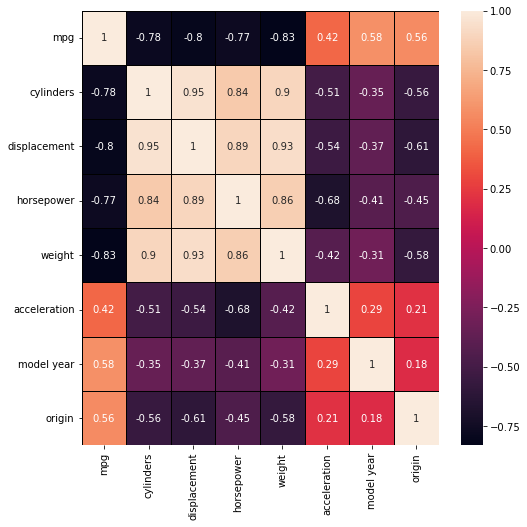

In [49]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

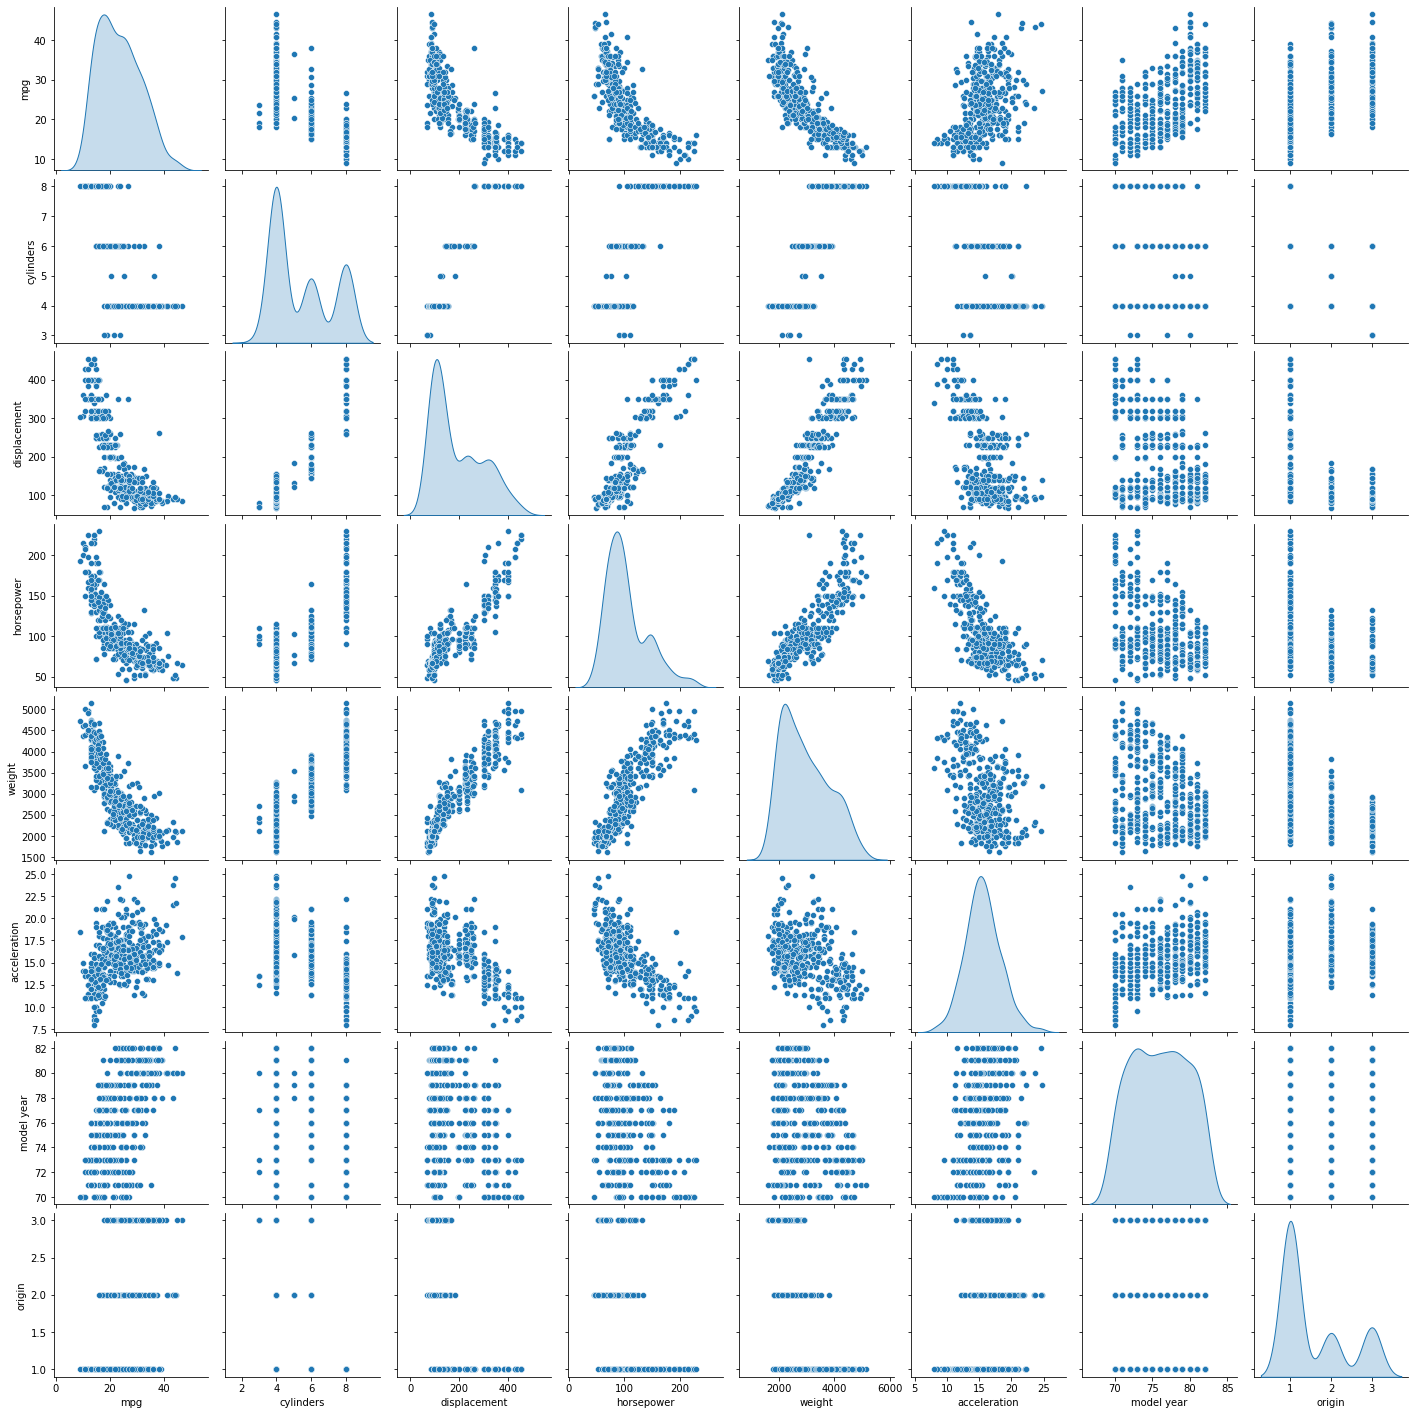

In [50]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

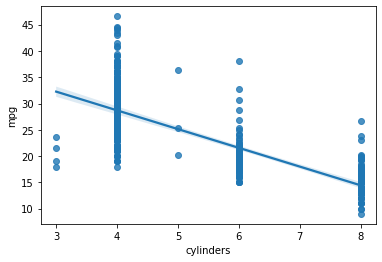

In [51]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

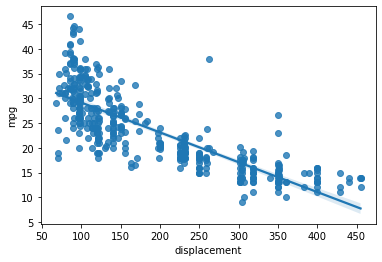

In [52]:
sns.regplot(x="displacement", y="mpg", data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

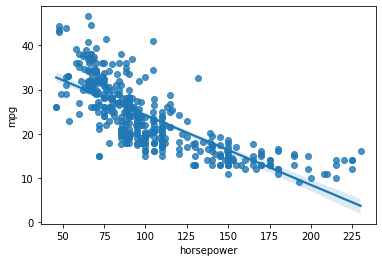

In [53]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

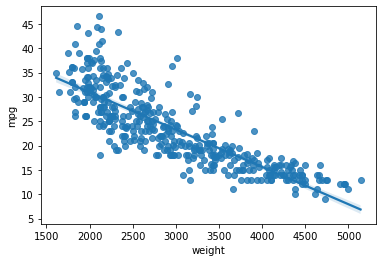

In [54]:
sns.regplot(x="weight", y="mpg", data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

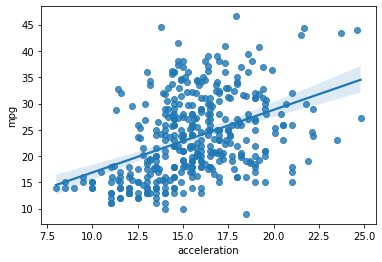

In [55]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

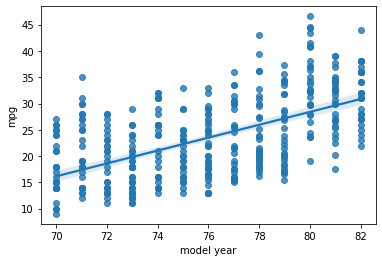

In [56]:
sns.regplot(x="model year", y="mpg", data=dataset)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

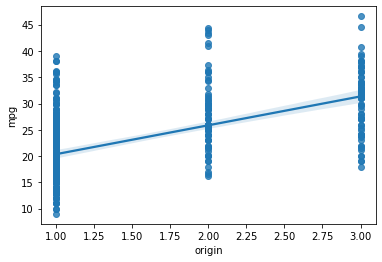

In [57]:
sns.regplot(x="origin", y="mpg", data=dataset)

<AxesSubplot:xlabel='mpg'>

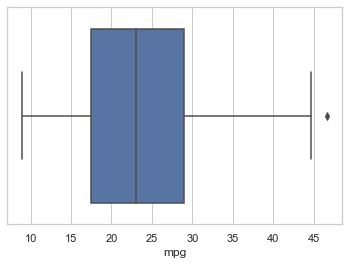

In [58]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

In [59]:
from scipy import stats

In [60]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7753962854205543  with a P-value of P = 4.503992246176927e-81


In [61]:
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.804202824805898  with a P-value of P = 1.655888910192639e-91


In [62]:
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7714371350025524  with a P-value of P = 9.255477533169094e-80


In [63]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
dataset=pd.read_csv('car performance.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [65]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     16.08
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.04e-77
Time:                        16:46:57   Log-Likelihood:                -1017.3
No. Observations:                 398   AIC:                             2233.
Df Residuals:                     299   BIC:                             2627.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.5041      2.803     10.884      0.000      24.989      36.020
horsepower[T.102]    -1.4564      3.759     -0.387      0.699      -8.855       5.942
horsepower[T.103]    -1.6086      3.754     -0.428      0.669      -8.997       5.780
horsepower[T.105]     2.0497      1.364      1.503      0.134      -0.634       4.733
horsepower[T.107]    -0.3786      3.795     -0.100      0.921      -7.847       7.090
horsepower[T.108]    -4.1493      3.818     -1.087      0.278     -11.662       3.364
horsepower[T.110]     0.6026      1.237      0.487      0.626      -1.831       3.036
horsepower[T.112]    -1.8413      2.279     -0.808      0.420      -6.326       2.644
horsepower[T.113]     1.6842      3.747      0.449      0.653      -5.690       9.058
horsepower[T.115]     3.2599      1.878      1.736      0.084      -0.436       6.956
horsepower[T.116]     1.3896      3.818      0.364      0.716      -6.124       8.903
horsepower[T.120]    -1.2107      2.107     -0.575      0.566      -5.357       2.936
horsepower[T.122]    -3.9888      3.822     -1.044      0.297     -11.510       3.532
horsepower[T.125]     1.0703      2.346      0.456      0.649      -3.546       5.687
horsepower[T.129]    -3.5433      2.825     -1.254      0.211      -9.103       2.016
horsepower[T.130]    -2.1998      2.035     -1.081      0.281      -6.205       1.805
horsepower[T.132]     8.3580      3.839      2.177      0.030       0.803      15.913
horsepower[T.133]    -4.2671      3.810     -1.120      0.264     -11.766       3.232
horsepower[T.135]     0.9455      3.778      0.250      0.803      -6.490       8.381
horsepower[T.137]    -3.0927      3.820     -0.810      0.419     -10.609       4.424
horsepower[T.138]    -0.9433      3.826     -0.247      0.805      -8.472       6.585
horsepower[T.139]    -0.0209      2.839     -0.007      0.994      -5.608       5.567
horsepower[T.140]    -0.8665      1.901     -0.456      0.649      -4.608       2.875
horsepower[T.142]    -1.4171      3.813     -0.372      0.710      -8.920       6.086
horsepower[T.145]    -2.0115      1.886     -1.066      0.287      -5.724       1.701
horsepower[T.148]    -1.9129      3.918     -0.488      0.626      -9.623       5.797
horsepower[T.149]    -0.2811      3.838     -0.073      0.942      -7.833       7.271
horsepower[T.150]    -2.7550      1.537     -1.793      0.074      -5.779       0.269
horsepower[T.152]    -2.5264      3.862     -0.654      0.513     -10.127       5.074
horsepower[T.153]    -3.0454      2.879     -1.058      0.291      -8.712       2.621
horsepower[T.155]    -1.2262      2.900     -0.423      0.673      -6.934       4.482
horsepower[T.158]    -3.6637      3.878     -0.945      0.346     -11.296       3.968
horsepower[T.160]    -5.0285      2.953     -1.703      0.090     -10.839

In [66]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8, 307.0, '130', 3504, 70, 1],
       [8, 350.0, '165', 3693, 70, 1],
       [8, 318.0, '150', 3436, 70, 1],
       ...,
       [4, 135.0, '84', 2295, 82, 1],
       [4, 120.0, '79', 2625, 82, 1],
       [4, 119.0, '82', 2720, 82, 1]], dtype=object)

In [67]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)


NameError: name 'y_pred' is not defined